<a href="https://colab.research.google.com/github/asutoshsabat91/akk/blob/main/Flight_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flight Booking Price Prediction**

**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Loading the Data**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Flight_Booking.csv")
df = df.drop(columns=["Unnamed: 0"])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


**Data Visualization**

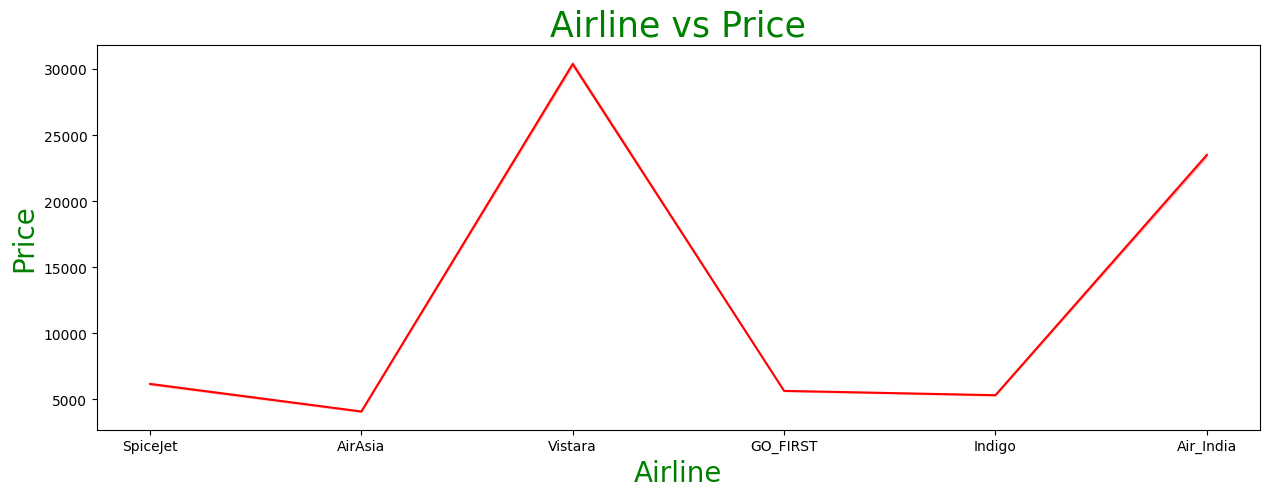

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'], color='red')
plt.title("Airline vs Price", fontsize=25, color='green')
plt.xlabel("Airline",fontsize=20, color='green')
plt.ylabel("Price", fontsize=20, color='green')
plt.show()

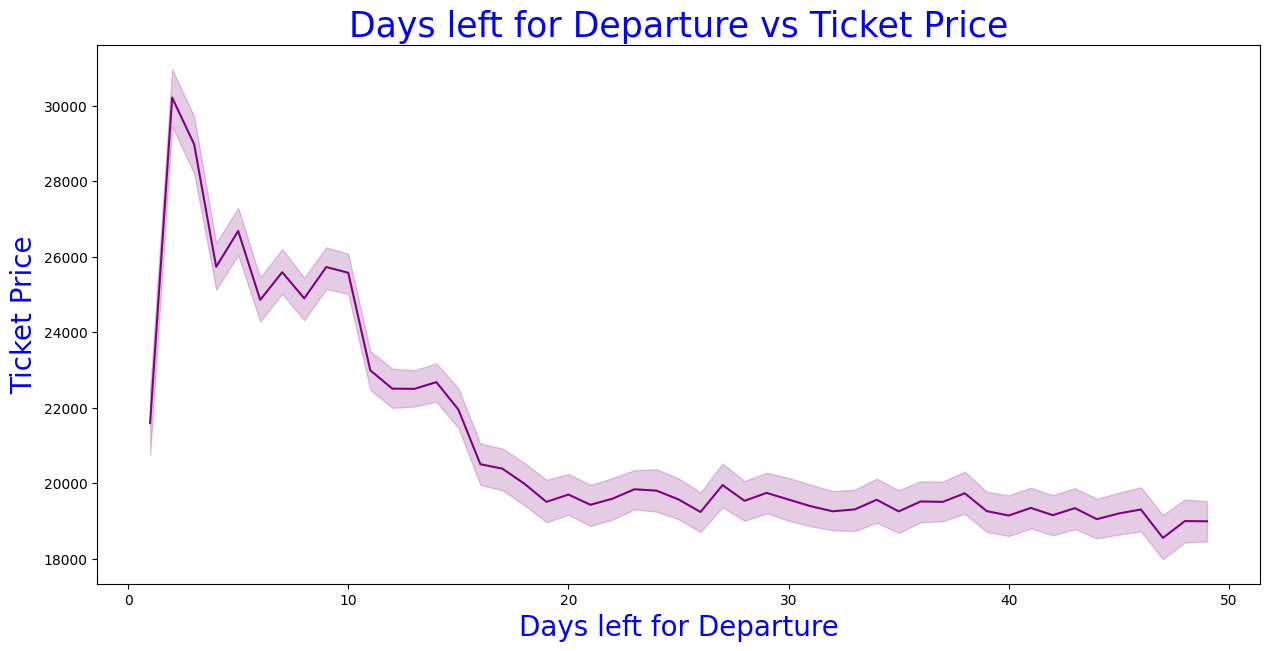

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df,x='days_left', y='price', color='purple')
plt.title('Days left for Departure vs Ticket Price', fontsize=25, color='blue')
plt.xlabel('Days left for Departure', fontsize=20, color='blue')
plt.ylabel('Ticket Price', fontsize=20, color='blue')
plt.show()

<Axes: xlabel='airline', ylabel='price'>

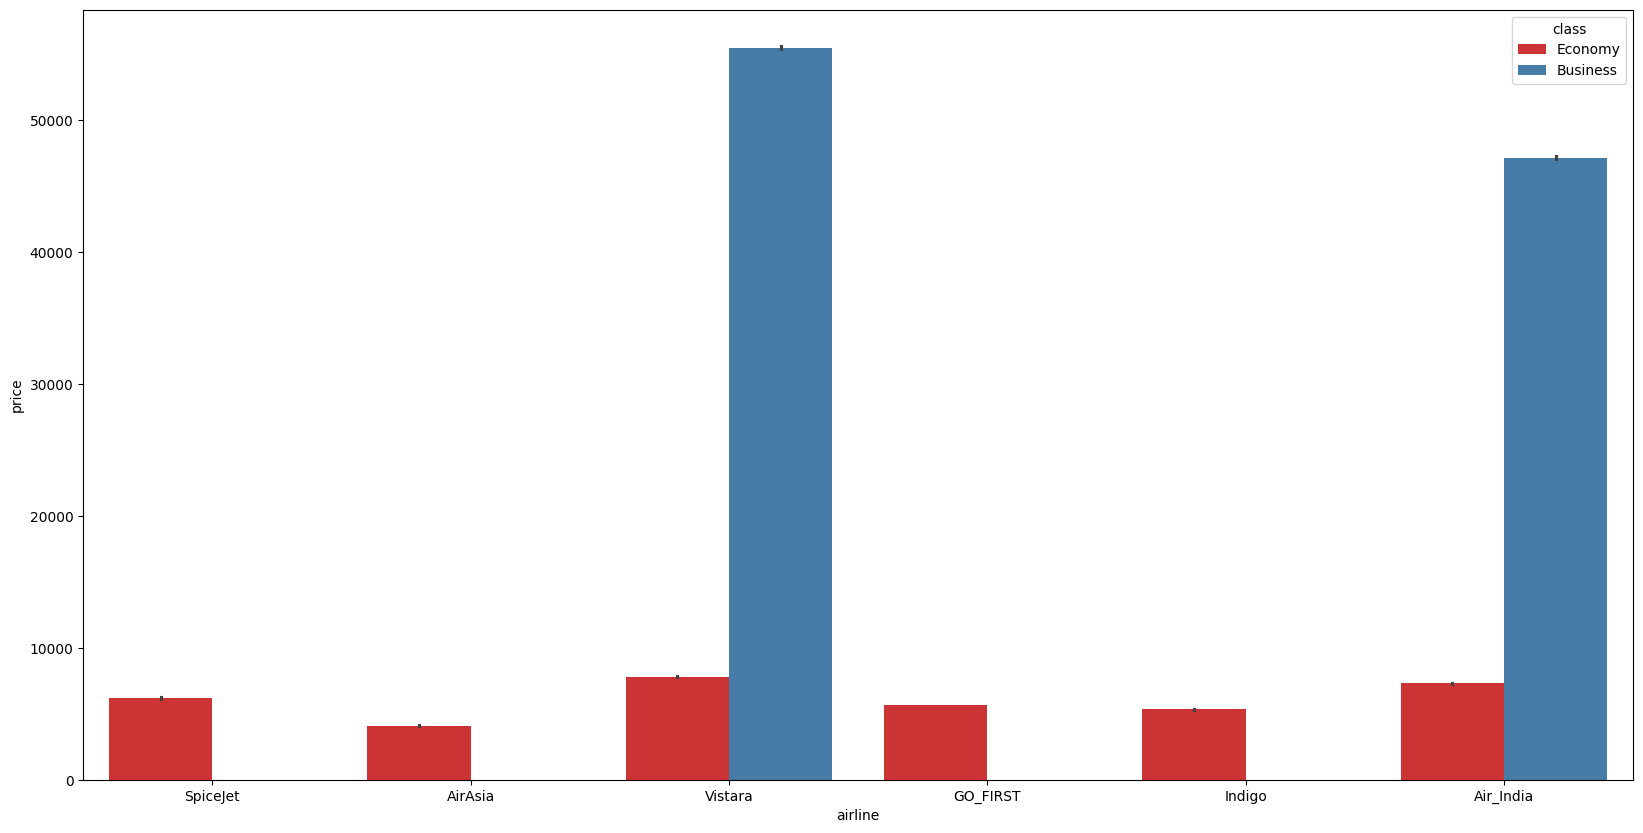

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='airline', y='price', data= df, hue='class', palette='Set1')

<Axes: xlabel='class', ylabel='price'>

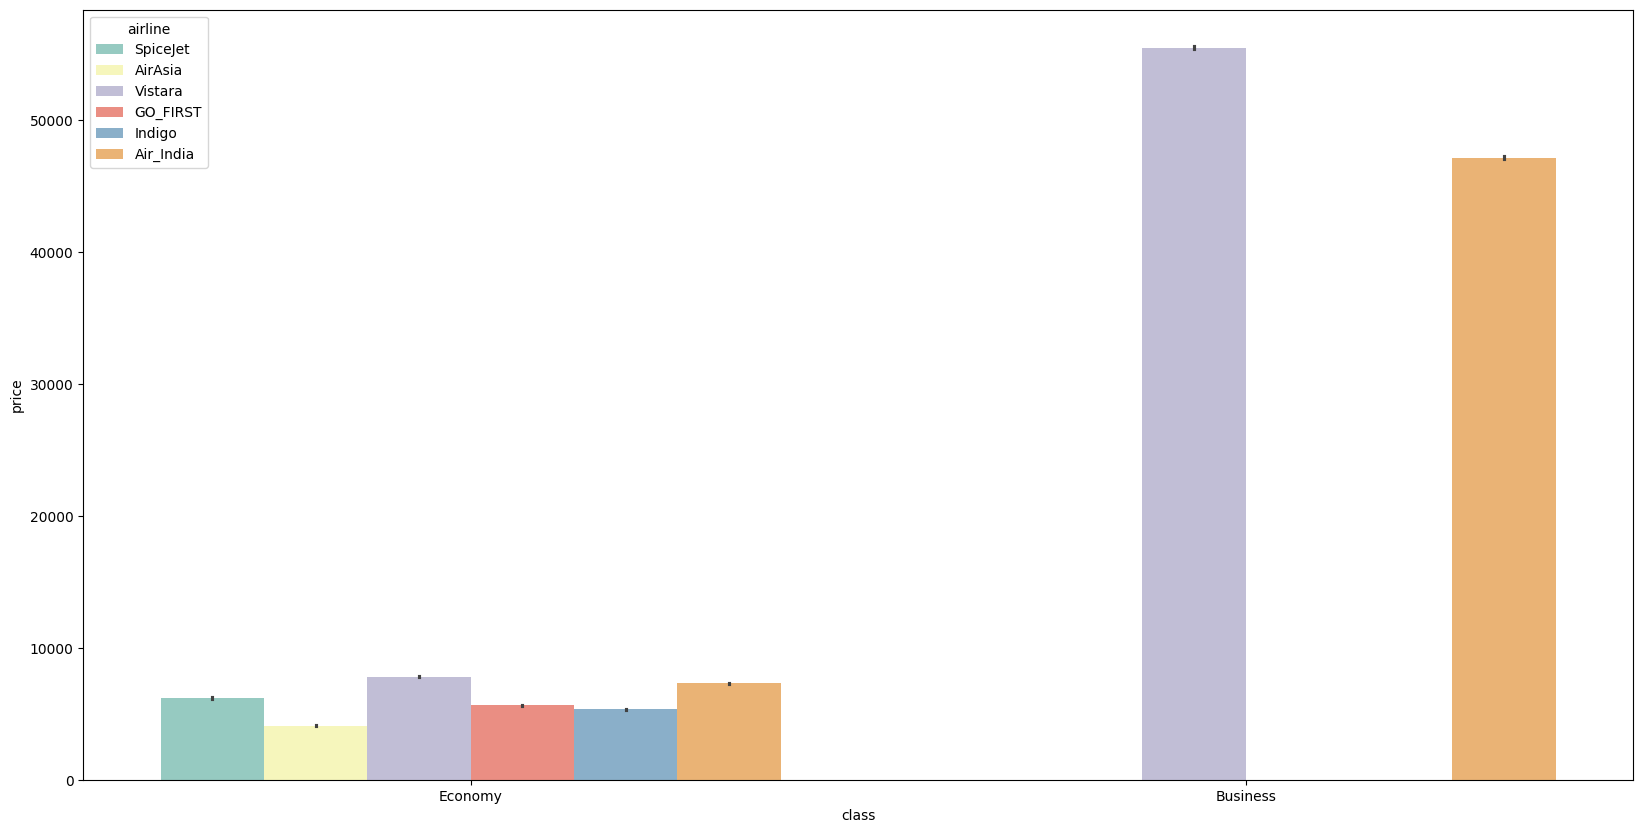

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='class', y='price', data=df, hue='airline', palette='Set3')

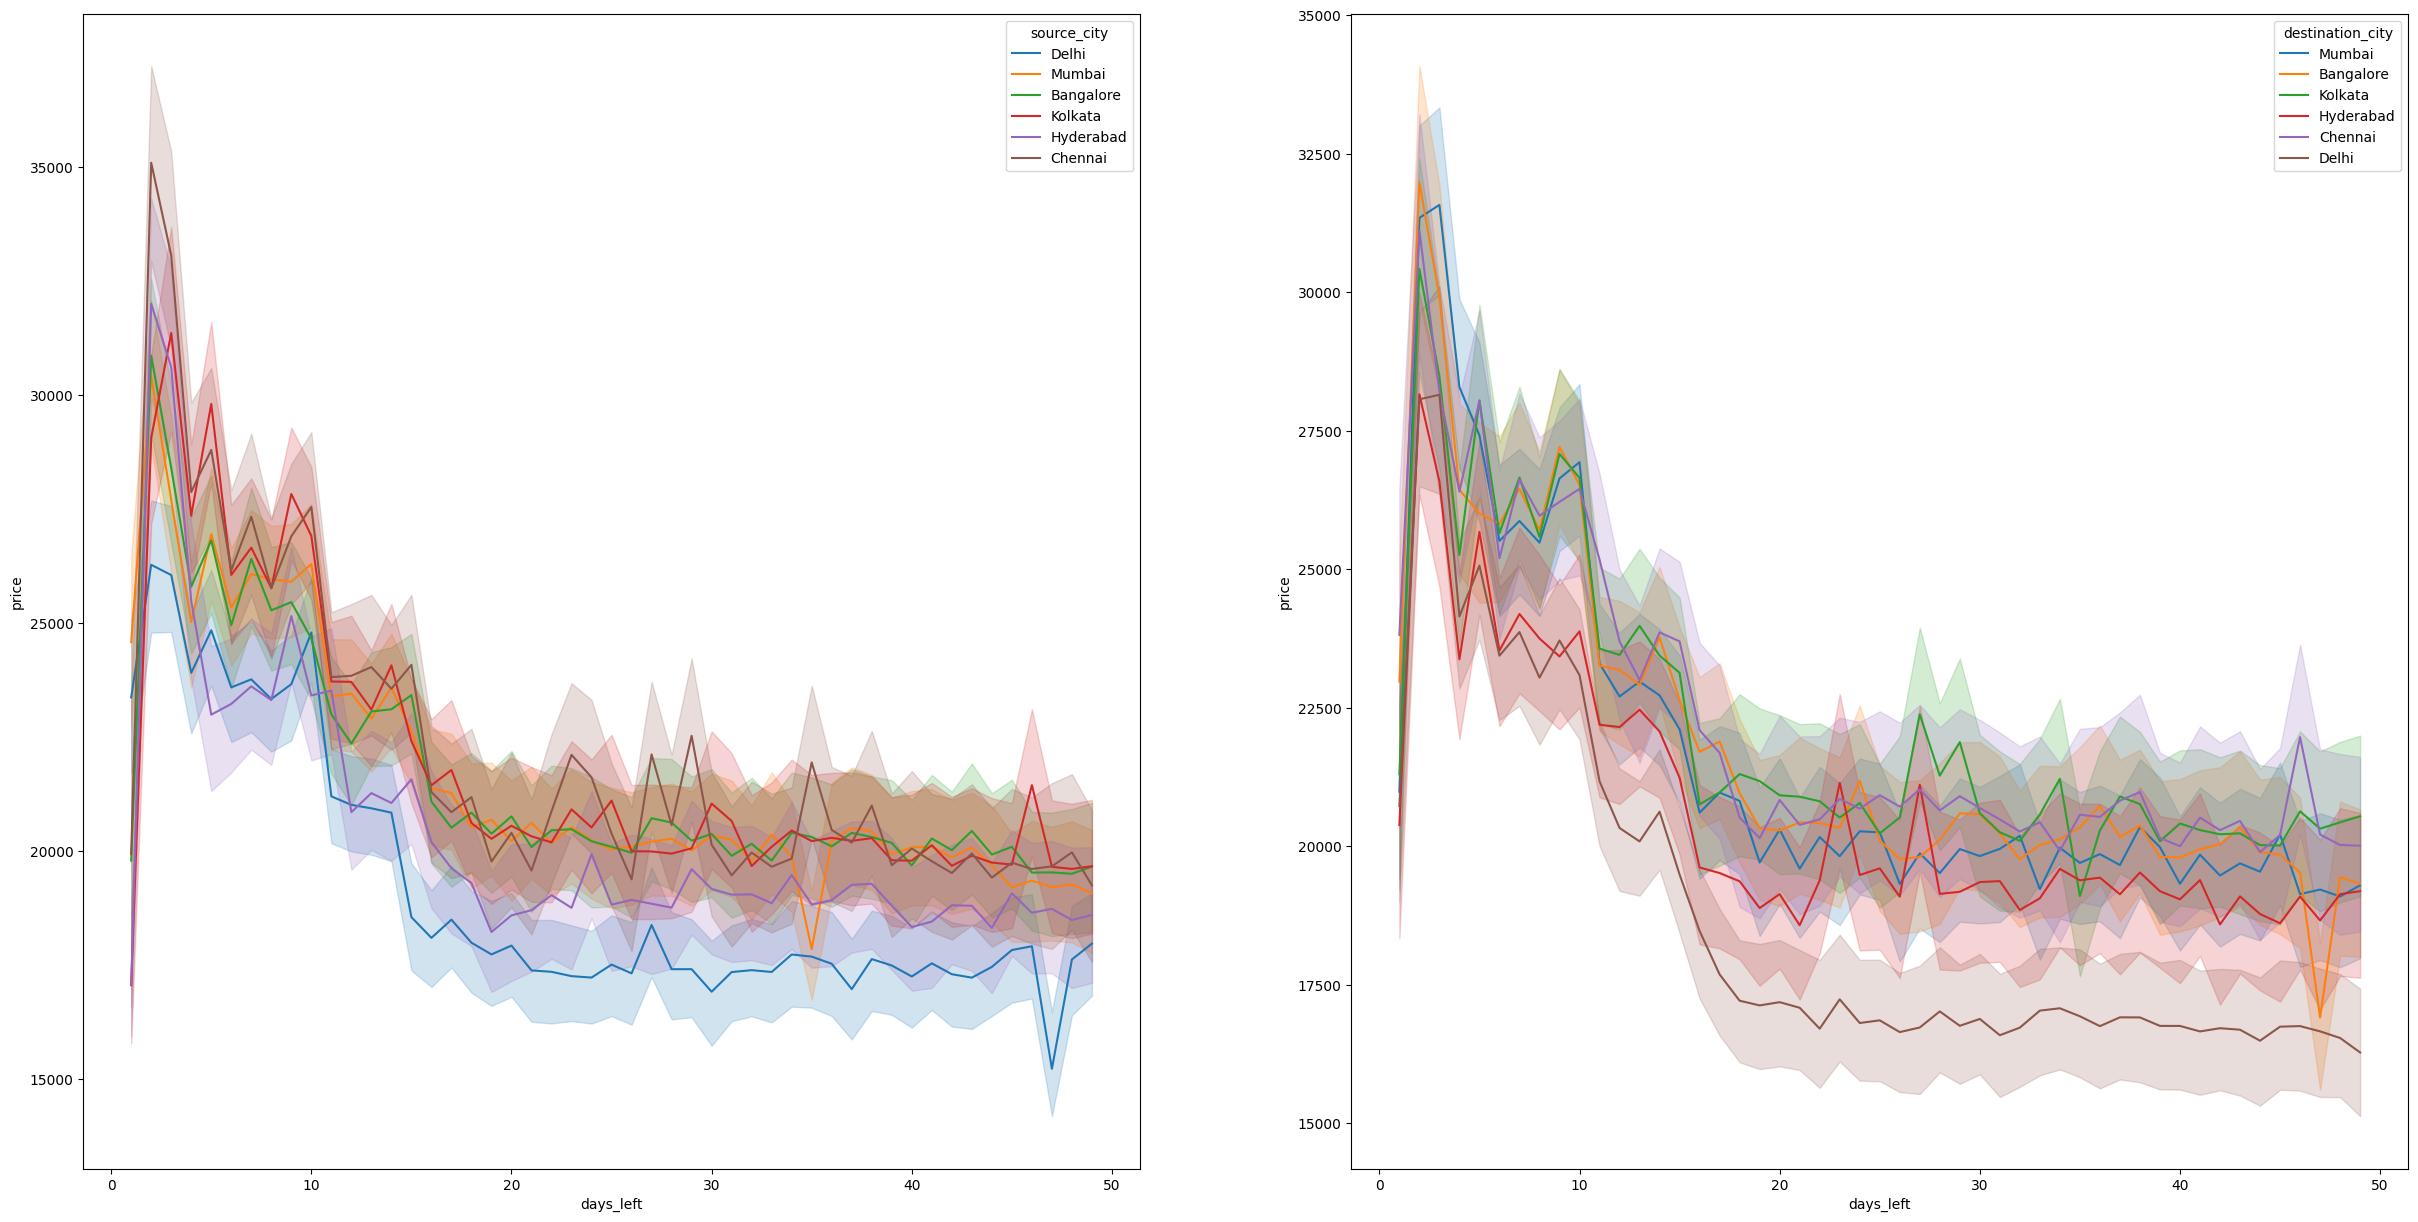

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(30,15))
sns.lineplot(x='days_left', y='price', data=df, hue='source_city', ax=ax[0])
sns.lineplot(x='days_left', y='price', data=df, hue='destination_city', ax=ax[1])
plt.show()

Text(0.5, 1.0, 'Frequency of destination City')

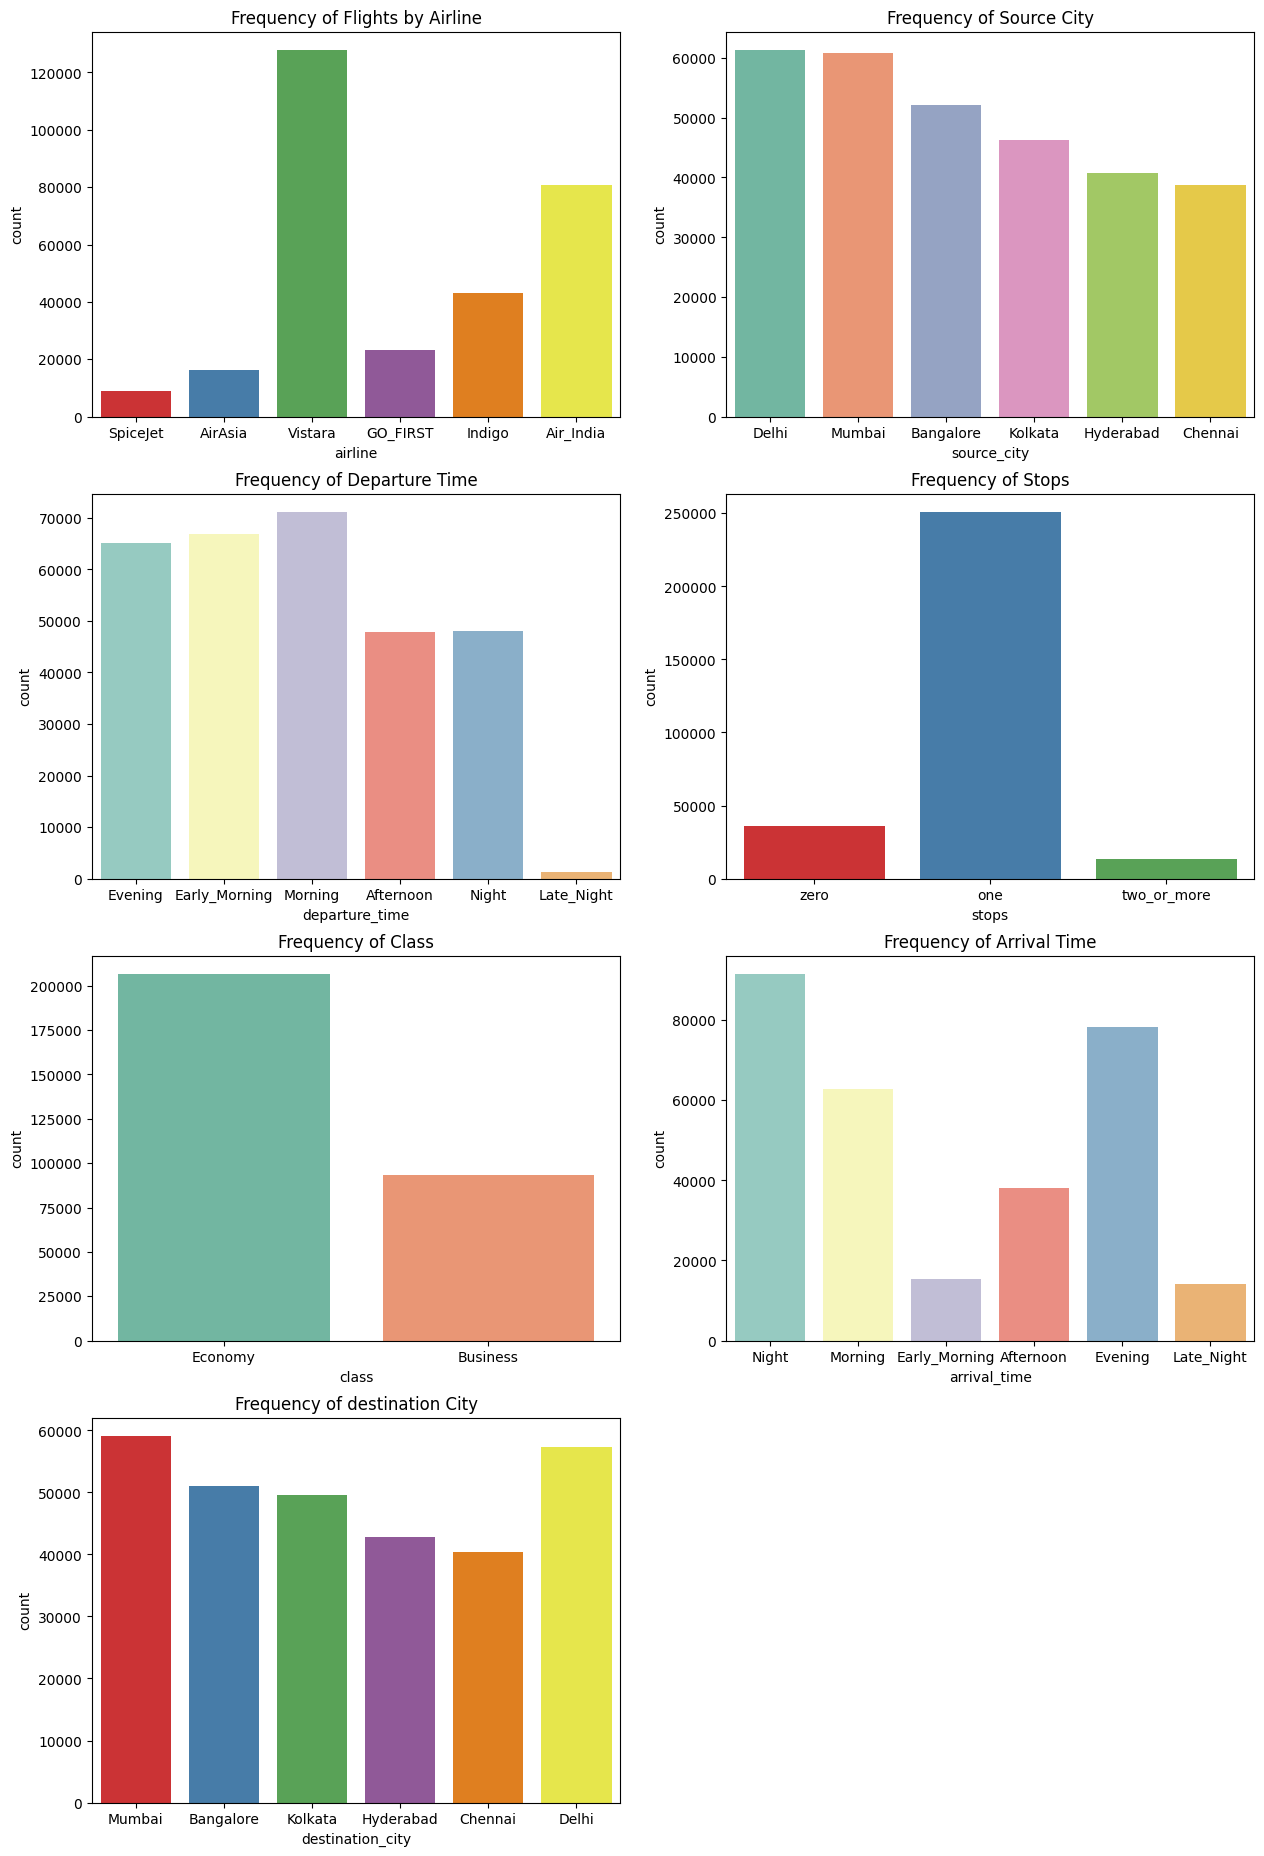

In [ ]:
plt.figure(figsize=(15,23))
plt.subplot(4,2,1)
sns.countplot(x='airline', data=df, palette='Set1')
plt.title('Frequency of Flights by Airline')

plt.subplot(4,2,2)
sns.countplot(x='source_city', data=df, palette='Set2')
plt.title('Frequency of Source City')

plt.subplot(4,2,3)
sns.countplot(x='departure_time', data=df, palette='Set3')
plt.title('Frequency of Departure Time')

plt.subplot(4,2,4)
sns.countplot(x='stops', data=df, palette='Set1')
plt.title('Frequency of Stops')

plt.subplot(4,2,5)
sns.countplot(x='class', data=df,palette='Set2')
plt.title('Frequency of Class')

plt.subplot(4,2,6)
sns.countplot(x='arrival_time', data=df, palette='Set3')
plt.title('Frequency of Arrival Time')

plt.subplot(4,2,7)
sns.countplot(x='destination_city', data=df, palette='Set1')
plt.title('Frequency of destination City')


**One Hot Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['airline']=le.fit_transform(df['airline'])
df['source_city']=le.fit_transform(df['source_city'])
df['departure_time']=le.fit_transform(df['departure_time'])
df['stops']=le.fit_transform(df['stops'])
df['arrival_time']=le.fit_transform(df['arrival_time'])
df['destination_city']=le.fit_transform(df['destination_city'])
df['class']=le.fit_transform(df['class'])
df['flight']=le.fit_transform(df['flight'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  int64  
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 25.2 MB


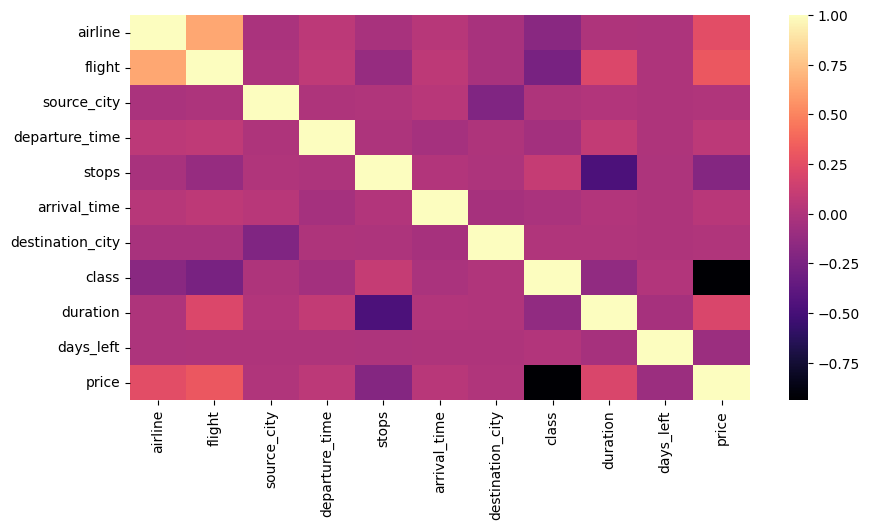

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=False, cmap="magma")
plt.show()

**Feature Selection**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if((df[col].dtype!='object')& (col!='price')):
    col_list.append(col)

X= df[col_list]
vif_data= pd.DataFrame()
vif_data['feature']= X.columns
vif_data['VIF']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)




            feature        VIF
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if((df[col].dtype!='object')& (col!='price')):
    col_list.append(col)

X= df[col_list]
vif_data= pd.DataFrame()
vif_data['feature']= X.columns
vif_data['VIF']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

            feature        VIF
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591


**Linear Regression**

In [ ]:
X= df.drop(columns=['price'])
y= df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
difference= pd.DataFrame(np.c_[y_test,y_pred], columns= ["Actual_Value", "Predicted_Value"])
difference


,Actual_Value,Predicted_Value
0,7366.0,4567.013416
1,64831.0,52844.339673
2,6195.0,7904.949552
3,60160.0,56121.015486
4,6578.0,6672.773495
...,...,...
60026,5026.0,5824.337078
60027,3001.0,371.004613
60028,6734.0,5843.835285
60029,5082.0,-1684.520514


**Error and Accuracy**

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
from sklearn import metrics
mean_abs_error= metrics.mean_absolute_error(y_test, y_pred)
mean_abs_error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)
mean_sq_error= metrics.mean_squared_error(y_test, y_pred)
mean_sq_error
root_mean_sq_error= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
root_mean_sq_error

np.float64(7013.558484851851)

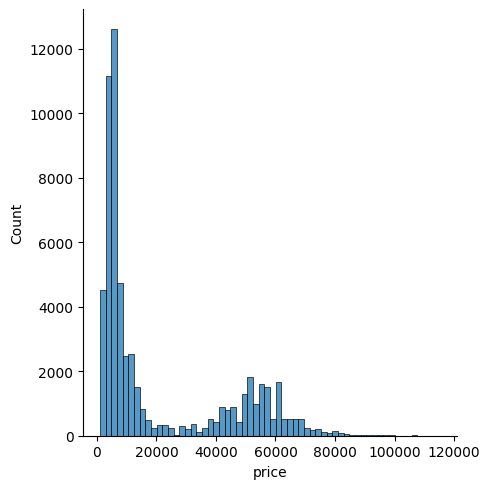

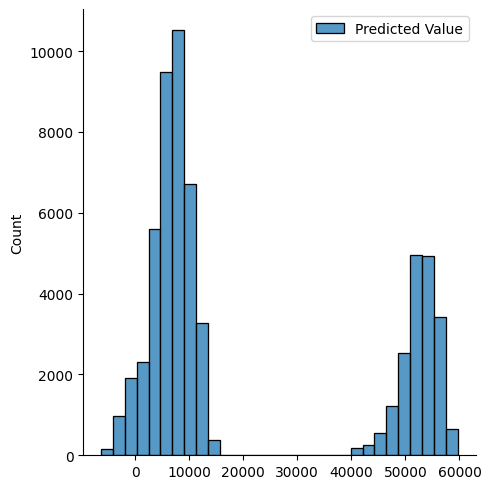

In [ ]:
sns.displot(y_test, label='Actual Value')
sns.displot(y_pred, label='Predicted Value')
plt.legend()
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred= dt.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
mean_abs_error= metrics.mean_absolute_error(y_test, y_pred)
print(mean_abs_error)
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, y_pred))
mean_sq_error= metrics.mean_squared_error(y_test, y_pred)
print(mean_sq_error)
root_mean_sq_error= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(root_mean_sq_error)

0.9826683385763176
892.3212034893083
0.0591257541865053
8934164.235405687
2989.0072324110706


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import pandas as pd


X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(r2_score(y_test, y_pred))
mean_abs_error = mean_absolute_error(y_test, y_pred)
print(mean_abs_error)
mean_absolute_percentage_error = mean_absolute_percentage_error(y_test, y_pred)
print(mean_absolute_percentage_error)
mean_sq_error = mean_squared_error(y_test, y_pred)
print(mean_sq_error)
root_mean_sq_error = np.sqrt(mean_squared_error(y_test, y_pred))
print(root_mean_sq_error)

0.9895623158167219
863.8969105517044
0.057268918525388623
5380441.173590024
2319.5778007193517


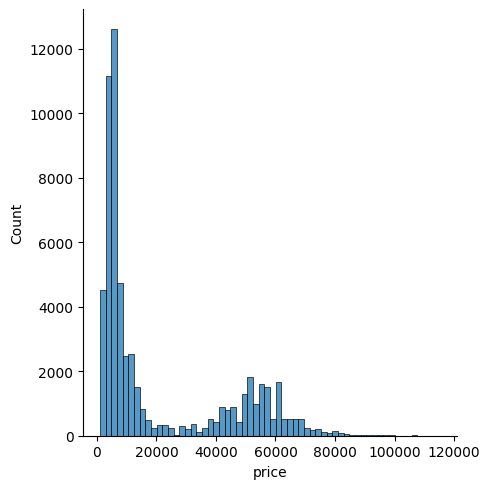

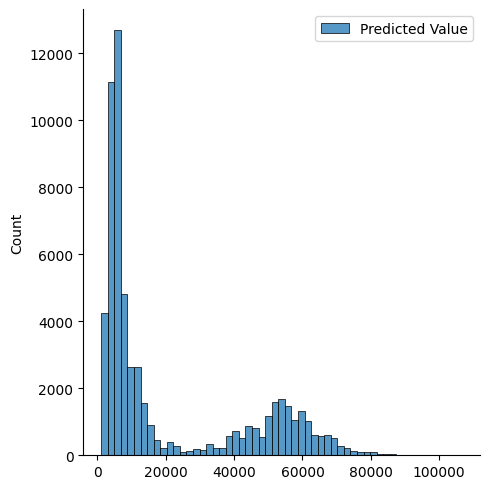

In [ ]:
sns.displot(y_test, label='Actual Value')
sns.displot(y_pred, label='Predicted Value')
plt.legend()
plt.show()